Author: Carlos Roberto de Melo

Date: 10/26/2020

Obj: Cut the original datacube of SDP-81 around the central galaxy.
     Cortar o cubo de dados original da SDP-81 ao redor da galáxia central.
     
     Due the presence of telluric lines, we apply ZAP (the Zurich Atmosphere Purge) software to improve the sky subtracted. So, the data cube read bellow is a ZAPed date cube.

In [1]:
from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa, sexa2deg
import astropy.units as u
import matplotlib.pyplot as plt

Opening the original data cube.
Abrindo o cubo original de dados.

In [2]:
cube = Cube('/home/carlos/Documents/Dados Projeto/SDP.81/Muse/Saida.fits')

Defining the center around where the cut will be made.

Definindo o centro ao redor de onde será feito o corte.

In [4]:
center_deg = ['0.6518871','135.7984080'] #Format is (DEC,RA). Units in degree
center_px = [157,187]                    #Direct from Header. Format (y,x) in px value

center_sex = deg2sexa(center_deg)              #Convert (DEC,RA) to degree/Convertendo (DEC,RA) para graus
print(center_sex) 

['00:39:06.7936' '09:03:11.6179']


### Making a square cut around the center defined above. ###

**center**: Defines the center for the cut.

**unit_center**: Defines the units of the center. In astropy units. If **None**, the unit is pixel.

**size**: Defines the  length square.

**unit_size**: Defines the units of size. In astropy units. If **None**, the unit is pixel.

**lbda**: Defines the wavelength range for extraction.

**unit_wave**: Defines the units of wavelength. In astropy units.

### Realizando o corte quadrado ao redor do centro definido acima.

**center**: Define o centro para para o corte.

**unit_center**: Define as unidades do centro, em unidades Astropy. Se for **None**, a unidade é pixel.

**size**: Define o comprimento do lado do quadrado.

**unit_size**: Define as unidades para o lado, em unidades Astropy. Se **Non**, então a unidade é pixel.

**lbda**: Define o range para extração de comprimento de onda.

**unit_wave**: Define a unidade para o comprimento de onda, em unidades Astropy.

In [6]:
corte = cube.subcube(center=center_px, size=12, lbda=(4800,8000), unit_center=None, unit_size=u.arcsec, unit_wave=u.angstrom)

Display informations about the cut and make a image.

Apresentra informações do corte e cria uma imagem.

[INFO] 2561 x 60 x 60 Cube (/home/carlos/Desktop/SDP/Dynamics/pPXF/Data/Cut.fits)
[INFO] .data(2561 x 60 x 60) (1e-20 erg / (Angstrom cm2 s)), .var(2561 x 60 x 60)
[INFO] center:(00:39:07.0985,09:03:11.6099) size:(12.000",12.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4799.70 max:7999.70 step:1.25 Angstrom


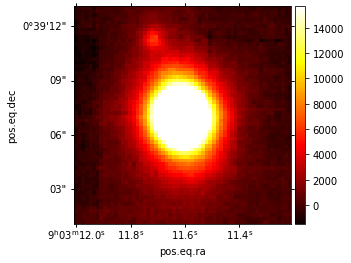

In [13]:
corte.info() #Display information/Apresenta informações
image = corte.sum(axis=0) #Make a image sum along the z axis/Faz uma imagem ao somar ao longo do eixo z
image.plot(use_wcs=True, cmap='hot',zscale=True, colorbar='v') #Plot image/Plota a imagem
plt.savefig('/home/carlos/Desktop/SDP/Dynamics/pPXF/Figs/SDP81.png', fmt='png') #Save the Image/Sava a image
corte.write('/home/carlos/Desktop/SDP/Dynamics/pPXF/Data/Cut.fits')#Save the fits file/Save o arquivo .fits

In [9]:
#Now we need a image with the same wavelength range, but bigger, for compute the PSF
img = cube.subcube(center=center_px, size=50, lbda=(4800,8000), unit_center=None, unit_size=u.arcsec, unit_wave=u.angstrom)

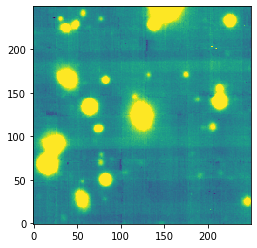

In [14]:
img_for_psf = img.sum(axis=0)
img_for_psf.plot(zscale=True)

In [16]:
img_for_psf.write("/home/carlos/Desktop/SDP/Dynamics/pPXF/Data/Img.fits")